In [55]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [3]:
import functools
import gc
import itertools
import sys
from timeit import default_timer as _timer

def timeit(_func=None, *, repeat=3, number=1000, file=sys.stdout):
    _repeat = functools.partial(itertools.repeat, None)

    def wrap(func):
        @functools.wraps(func)
        def _timeit(*args, **kwargs):
            gcold = gc.isenabled()
            gc.disable()

            try:
                trials = []
                for _ in _repeat(repeat):
                    total = 0
                    for _ in _repeat(number):
                        start = _timer()
                        result = func(*args, **kwargs)
                        end = _timer()
                        total += end - start
                    trials.append(total)

                best = min(trials) / number
                print('Best of {} trials with {} function'
                      ' calls per trial:'.format(repeat, number))
                print('Function `{}` ran in average'
                      ' of {:0.3f} seconds.'.format(func.__name__, best),
                      end='\n\n', file=file)
            finally:
                if gcold:
                    gc.enable()
            return best, result
        return _timeit
    if _func is None:
        return wrap
    else:
        return wrap(_func)


In [4]:
df = pd.read_csv(Path.home()/'.kaggle/competitions/competitive-data-science-final-project/sales_train.csv.gz', compression='gzip')

In [5]:
df['date'].head()

0    02.01.2013
1    03.01.2013
2    05.01.2013
3    06.01.2013
4    15.01.2013
Name: date, dtype: object

In [6]:
df.shape

(2935849, 6)

In [7]:
df10000 = df.head(10000)

In [68]:
@timeit(repeat=3, number=10)
def convert_to_datetime(s):
    return pd.to_datetime(s)

In [73]:
@timeit(repeat=3, number=10)
def convert_to_datetime_with_format(s, format_='%d.%m.%Y'):
    return pd.to_datetime(s, format=format_)

In [33]:
best_time, parsed_datetime = convert_to_datetime(df10000['date'])

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime` ran in average of 0.883 seconds.



In [34]:
best_time, parsed_datetime = convert_to_datetime_with_format(df10000['date'])

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime_with_format` ran in average of 0.024 seconds.



In [28]:
n_targets = [100, 1000, 10000, 100000, 1000000]

In [29]:
normal_best_times = []
format_best_times = []

for n in n_targets:
    target_df = df.head(n)

    best_time, parsed_datetime = convert_to_datetime_with_format(target_df['date'])
    format_best_times.append(best_time)

    best_time, parsed_datetime = convert_to_datetime(target_df['date'])
    normal_best_times.append(best_time)

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime_with_format` ran in average of 0.001 seconds.

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime` ran in average of 0.010 seconds.

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime_with_format` ran in average of 0.002 seconds.

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime` ran in average of 0.086 seconds.

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime_with_format` ran in average of 0.022 seconds.

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime` ran in average of 1.017 seconds.

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime_with_format` ran in average of 0.252 seconds.

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime` ran in average of 10.155 seconds.

Best of 3 trials with 1

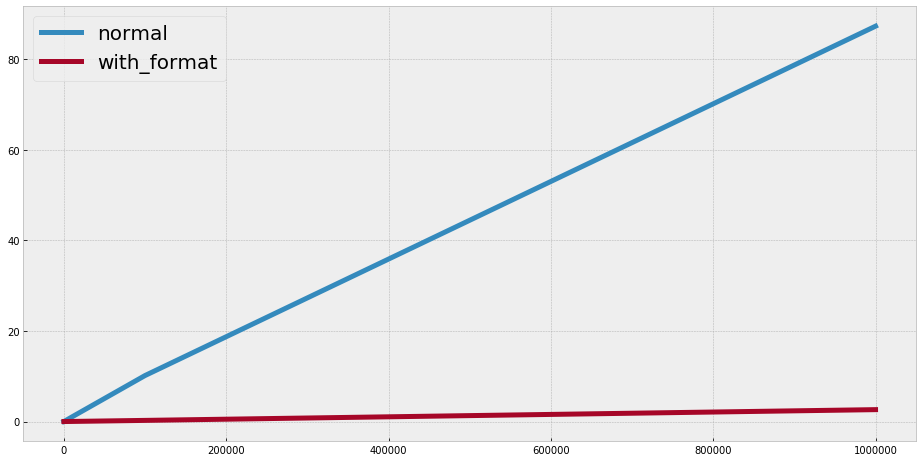

In [76]:
plt.figure(figsize=(16, 8))
ax = plt.subplot()
ax.plot(n_targets, normal_best_times, color='C0', linewidth=5, label='normal')
ax.plot(n_targets, format_best_times, color='C1', linewidth=5, label='with_format')
plt.legend(fontsize=20)

In [79]:
ratio = (np.array(normal_best_times) / np.array(format_best_times)).mean()
print(f'with_format parse take only {ratio:.2f} times faster than normal parse time')

with_format parse take only 34.00 times faster than normal parse time


In [77]:
df['new_date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [83]:
target_s1 = pd.Series(['2018-10-03', '2018-10-02', '2018-10-01'] * 10000)
target_s2 = pd.Series(['03.10.2018', '02.10.2018', '01.10.2018'] * 10000)

best_time, parsed_datetime = convert_to_datetime(target_s1)
best_time, parsed_datetime = convert_to_datetime_with_format(target_s1, format_='%Y-%m-%d')

best_time, parsed_datetime = convert_to_datetime(target_s2)
best_time, parsed_datetime = convert_to_datetime_with_format(target_s2, format_='%d.%m.%Y')

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime` ran in average of 0.005 seconds.

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime_with_format` ran in average of 0.005 seconds.

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime` ran in average of 2.884 seconds.

Best of 3 trials with 10 function calls per trial:
Function `convert_to_datetime_with_format` ran in average of 0.072 seconds.



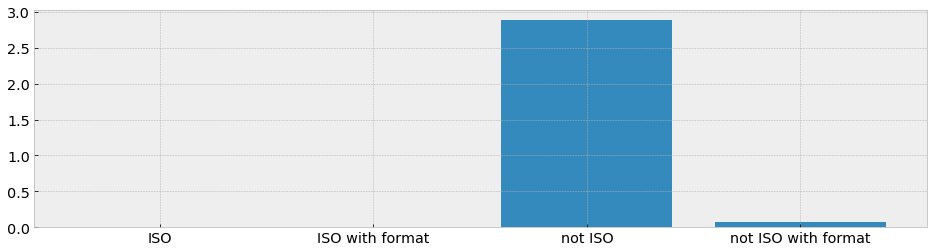

In [91]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()
ax.bar(['ISO', 'ISO with format', 'not ISO', 'not ISO with format'], [0.005, 0.005, 2.884, 0.072])
ax.tick_params(labelsize='x-large')